In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import run_ML_classification as ml

In [4]:
from joblib import dump, load
stack = load('10CC_ML_classifier.joblib') 

In [5]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)


[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [6]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

# ponlies

In [7]:
dpath = '../results'
ponly_df = pd.read_csv(os.path.join(dpath,'monte_ponly_clean_df.csv.gz',))


In [8]:
ponly_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [9]:
ponly_df[['id', 'media', 'which', 'model', 'hash']] =     ponly_df.run_id.str.rsplit('_', n=4, expand=True)


In [10]:
ponly_df_lowN = ponly_df.loc[ponly_df.media.isin(['lowN'])]
ponly_df_lowN

,Bp,Np,Cp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,Bp[C],ref_Bp[N],ref_Bp[C],run_id,idx,id,media,which,model,hash
0,8.928571e-01,0.000000,0.000000e+00,3.000000,0.000000,100.000000,19.875000,0.000000,2241.552301,2.000000e-01,...,5.915179e+00,0.892857,5.915179e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
1,9.015690e-01,0.342126,3.463992e-01,3.036171,0.075810,99.537181,20.111342,0.419613,2240.544073,2.000000e-01,...,5.972895e+00,1.243695,6.319294e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
2,9.981395e-01,0.447436,4.459904e-01,3.082132,0.169170,99.195980,20.371718,0.881898,2239.268507,2.000000e-01,...,6.612674e+00,1.445575,7.058665e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
3,1.061663e+00,0.485570,4.821232e-01,3.109936,0.224939,99.010750,20.524632,1.153389,2238.549040,2.000000e-01,...,7.033515e+00,1.547233,7.515638e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
4,1.184076e+00,0.547293,5.421534e-01,3.163049,0.330451,98.667988,20.812794,1.665006,2237.263908,2.000000e-01,...,7.844504e+00,1.731369,8.386657e+00,monte_ponly_EXOENZYME_99_monte__96_lowN_ponly_...,monte_ponly_EXOENZYME_99_monte__96_EXOENZYME,monte_ponly_EXOENZYME_99_monte__96,lowN,ponly,EXOENZYME,h2291012746155587316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582307,2.244595e-11,0.000028,7.066954e-33,3.215614,0.252082,100.425134,23.566105,0.922776,2241.552317,7.203458e-13,...,1.487045e-10,0.000028,1.487045e-10,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071
6582308,8.460400e-12,0.000019,7.611836e-33,3.184249,0.252083,100.456506,23.566105,0.922776,2241.552311,2.373686e-13,...,5.605015e-11,0.000019,5.605015e-11,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071
6582309,4.709627e-12,0.000015,-1.096020e-33,3.165564,0.252084,100.475194,23.566105,0.922776,2241.552308,1.224276e-13,...,3.120128e-11,0.000015,3.120128e-11,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071
6582310,2.597886e-12,0.000012,2.413000e-33,3.146700,0.252085,100.494061,23.566105,0.922776,2241.552306,6.271628e-14,...,1.721100e-11,0.000012,1.721100e-11,monte_ponly_ROS_95_monte__7_lowN_ponly_ROS_h-2...,monte_ponly_ROS_95_monte__7_ROS,monte_ponly_ROS_95_monte__7,lowN,ponly,ROS,h-2025029465965034071


In [11]:
X_ponly_lowN, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(
    ponly_df_lowN, groupby_cols=['run_id', 'idx', 'model'])


In [12]:
X_ponly, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(
    ponly_df, groupby_cols=['run_id', 'idx', 'model', 'media'])


In [13]:
X_ponly_lowN

,,,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,mean_30-60days_Nbiomass,std_30-60days_Cbiomass,median_30-60days_Cbiomass,mean_30-60days_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,idx,model,,,,,,,,,,,,,,,,,,,,,
monte_ponly_EXOENZYME_100_monte__0_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
monte_ponly_EXOENZYME_100_monte__10_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,12.830556,76.937915,13.695833,461.164272,3.642478,5.083520,6.218467,31.373550,42.254994,52.028402,...,0.572687,0.547289,0.529819,0.524223,0.519252,0.510173,0.501508,0.499005,0.496557,0.491493
monte_ponly_EXOENZYME_100_monte__11_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__11_EXOENZYME,EXOENZYME,69.802083,33.612576,72.775000,186.546410,4.735901,8.996902,10.200794,25.113502,47.712403,54.095990,...,3.250398,2.951306,2.688571,2.589953,2.494758,2.298025,2.074382,2.001439,1.925796,1.753964
monte_ponly_EXOENZYME_100_monte__12_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__12_EXOENZYME,EXOENZYME,44.759028,80.957543,46.794444,568.209472,19.657375,58.102238,53.946108,162.087152,419.069641,380.531133,...,3.726158,3.656984,3.595477,3.572124,3.549404,3.501760,3.446091,3.427480,3.407891,3.362074
monte_ponly_EXOENZYME_100_monte__13_lowN_ponly_EXOENZYME_h2291012746155587316,monte_ponly_EXOENZYME_100_monte__13_EXOENZYME,EXOENZYME,26.747222,57.998203,27.852778,303.790640,11.200333,12.245175,15.740444,83.944005,92.834733,118.311530,...,0.741586,0.676306,0.630331,0.615451,0.602195,0.577925,0.554815,0.548179,0.541717,0.528489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte_ponly_ROS_9_monte__96_lowN_ponly_ROS_h-2025029465965034071,monte_ponly_ROS_9_monte__96_ROS,ROS,91.000000,13.655531,91.000000,68.018363,0.283399,1.000000,1.130259,2.509347,3.239714,3.999248,...,1.558926,1.756150,1.932423,1.999630,2.065188,2.203276,2.365833,2.420506,2.478247,2.614145
monte_ponly_ROS_9_monte__97_lowN_ponly_ROS_h-2025029465965034071,monte_ponly_ROS_9_monte__97_ROS,ROS,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,1.000000,0.156006,4.082168,4.095096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
monte_ponly_ROS_9_monte__98_lowN_ponly_ROS_h-2025029465965034071,monte_ponly_ROS_9_monte__98_ROS,ROS,19.711111,70.649814,20.778472,517.241323,6.797701,7.708972,9.778451,59.796147,67.258103,85.460505,...,0.218335,0.129096,0.061979,0.039270,0.018544,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
df_predicted_classes = ml.ML_model_predict_proba(stack, X_ponly_lowN)

In [15]:
df_predicted_classes.to_csv('monte_ponly_predicted_classes.csv.gz', index=False)

In [16]:
df_ponly_maxday  = X_ponly_lowN[forest_features].reset_index()

In [17]:
df_ponly_maxday.to_csv('features_monte_ponly_clean.csv.gz', index=False)

In [18]:
df_ponly_maxday  = X_ponly[forest_features].reset_index()

In [19]:
df_ponly_maxday.to_csv('features_monte_ponly_clean.csv.gz', index=False)

In [20]:
df_ponly_maxday

,run_id,idx,model,media,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,...,std_60-80days_Nbiomass,median_60-80days_Nbiomass,mean_60-80days_Nbiomass,std_60-80days_Cbiomass,median_60-80days_Cbiomass,mean_60-80days_Cbiomass,last_dayN,last_dayC,D90_dayN,D90_dayC
0,monte_ponly_EXOENZYME_100_monte__0_lowN_ponly_...,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,lowN,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.747222,0.000000,0.000000
1,monte_ponly_EXOENZYME_100_monte__0_pro99_ponly...,monte_ponly_EXOENZYME_100_monte__0_EXOENZYME,EXOENZYME,pro99,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.122222,0.000000,0.000000
2,monte_ponly_EXOENZYME_100_monte__10_lowN_ponly...,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,lowN,12.830556,76.937915,13.695833,461.164272,3.642478,5.083520,...,0.127084,1.852055,1.859919,1.094138,14.414105,14.482404,62.892361,91.000000,24.958333,31.063194
3,monte_ponly_EXOENZYME_100_monte__10_pro99_ponl...,monte_ponly_EXOENZYME_100_monte__10_EXOENZYME,EXOENZYME,pro99,20.008333,546.590868,24.114583,2303.364498,52.478363,63.709480,...,2.408363,16.803635,17.197330,20.753485,132.909353,136.302872,85.796528,85.796528,25.947917,31.780556
4,monte_ponly_EXOENZYME_100_monte__11_lowN_ponly...,monte_ponly_EXOENZYME_100_monte__11_EXOENZYME,EXOENZYME,lowN,69.802083,33.612576,72.775000,186.546410,4.735901,8.996902,...,5.887443,27.350074,25.863366,26.084685,155.049991,153.337429,91.000000,91.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99727,monte_ponly_ROS_9_monte__98_pro99_ponly_ROS_h-...,monte_ponly_ROS_9_monte__98_ROS,ROS,pro99,27.083333,516.368482,29.145139,2265.100380,102.929504,105.397567,...,4.675937,14.020885,14.782395,41.121025,119.230793,125.927836,85.796528,85.796528,24.032639,32.881944
99728,monte_ponly_ROS_9_monte__99_lowN_ponly_ROS_h-2...,monte_ponly_ROS_9_monte__99_ROS,ROS,lowN,91.000000,3.369212,91.000000,31.696800,0.165256,1.010269,...,0.292154,1.959566,2.024832,2.748515,18.435186,19.049197,91.000000,91.000000,0.000000,0.000000
99729,monte_ponly_ROS_9_monte__99_pro99_ponly_ROS_h-...,monte_ponly_ROS_9_monte__99_ROS,ROS,pro99,85.796528,2.970939,85.796528,27.949135,0.169172,1.000929,...,0.272997,1.884703,1.903371,2.568219,17.730396,17.906009,85.796528,85.796528,0.000000,0.000000
99730,monte_ponly_ROS_9_monte__9_lowN_ponly_ROS_h-20...,monte_ponly_ROS_9_monte__9_ROS,ROS,lowN,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.754167,0.000000,0.000000


Text(0.5, 1.1, 'Prochlorococcus \nmonoculture montecarlo')

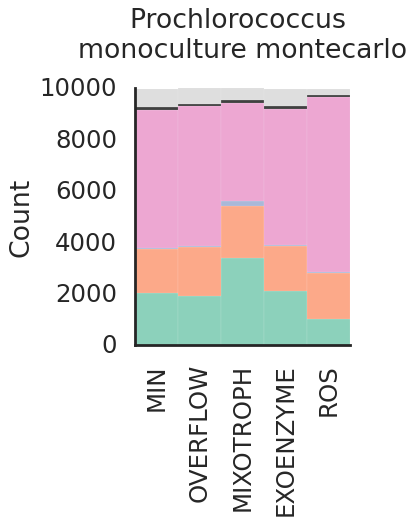

In [25]:
df_predicted_classes['model_'] = pd.Categorical(df_predicted_classes['model'], morder)

g = sns.displot(
    data=df_predicted_classes, linewidth=0.1,
    hue='y_pred', 
      discrete=True, multiple='stack',
    hue_order=reversed(gorder), palette=reversed(gpalette),
    x='model_', #col_order=morder,
    #y='VPRO_cluster',# row_order=['C1', 'C2', 'C3', 'C4', 'C0'],
    legend=False,
    #stat='probability',
    facet_kws=dict(sharex=False),
    #aspect=2,height=5, #col_wrap=3,
    
           ).set_titles(col_template='{col_name}').set(xlabel='')
g.set_xticklabels(rotation=90)
plt.title('Prochlorococcus \nmonoculture montecarlo', y=1.1)

# additional ponlies

In [26]:
dpath = '../results'
ponly_df = pd.read_csv(os.path.join(dpath,'monte_strong_ponly_clean_df.csv.gz',))


In [27]:
ponly_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [28]:
ponly_df[['id', 'media', 'which', 'model', 'hash']] =     ponly_df.run_id.str.rsplit('_', n=4, expand=True)


In [29]:
ponly_df_lowN = ponly_df.loc[ponly_df.media.isin(['lowN'])]
ponly_df_lowN

,Bp,Np,Cp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,Bp[C],ref_Bp[N],ref_Bp[C],run_id,idx,id,media,which,model,hash
0,0.892857,0.000000,0.000000,3.000000,0.000000,100.000000,19.875000,0.000000,2241.552301,0.200000,...,5.915179,0.892857,5.915179,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,lowN,ponly,EXOENZYME,h7074824497105437591
1,0.460973,0.285970,0.050445,3.287178,0.335434,99.523302,21.260458,1.580745,2241.403018,0.200000,...,3.053943,0.746942,3.104388,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,lowN,ponly,EXOENZYME,h7074824497105437591
2,0.247014,0.160726,0.032411,3.459873,0.540828,99.484416,22.000856,2.425505,2241.278427,0.200000,...,1.636465,0.407740,1.668876,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,lowN,ponly,EXOENZYME,h7074824497105437591
3,0.176908,0.115323,0.023417,3.515566,0.609010,99.476051,22.245365,2.704479,2241.246254,0.200000,...,1.172014,0.292231,1.195432,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,lowN,ponly,EXOENZYME,h7074824497105437591
4,0.099386,0.064814,0.013184,3.574561,0.684474,99.469622,22.515908,3.013156,2241.224707,0.200000,...,0.658430,0.164200,0.671614,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,lowN,ponly,EXOENZYME,h7074824497105437591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475227,3.842431,0.128135,11.255219,17.279170,6.953748,75.689373,166.686204,64.179914,2206.847865,0.028633,...,25.456105,3.970566,36.711324,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91,lowN,ponly,ROS,h3292284166414200945
475228,3.851285,0.128431,11.281131,18.465047,7.548767,73.899327,179.270779,69.681381,2206.630419,0.028690,...,25.514764,3.979716,36.795895,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91,lowN,ponly,ROS,h3292284166414200945
475229,3.855267,0.128563,11.292783,19.173724,7.906997,72.828306,186.847302,72.993530,2206.530109,0.028716,...,25.541143,3.983830,36.833925,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91,lowN,ponly,ROS,h3292284166414200945
475230,3.858524,0.128672,11.302313,19.890522,8.271396,71.743744,194.554267,76.362703,2206.446668,0.028737,...,25.562719,3.987195,36.865032,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91...,monte2_ponly_ROS_vpro_19_33_ROS_C0_1_monte__91,lowN,ponly,ROS,h3292284166414200945


In [30]:
X_ponly_lowN, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(
    ponly_df_lowN, groupby_cols=['run_id', 'idx', 'model'])


In [31]:
X_ponly, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(
    ponly_df, groupby_cols=['run_id', 'idx', 'model', 'media'])


In [32]:
X_ponly_lowN

,,,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,mean_30-60days_Nbiomass,std_30-60days_Cbiomass,median_30-60days_Cbiomass,mean_30-60days_Cbiomass,...,ref_Bp[N]_73.8,ref_Bp[N]_76.9,ref_Bp[N]_79.8,ref_Bp[N]_80.9,ref_Bp[N]_82.0,ref_Bp[N]_84.2,ref_Bp[N]_86.9,ref_Bp[N]_87.8,ref_Bp[N]_88.7,ref_Bp[N]_91.0
run_id,idx,model,,,,,,,,,,,,,,,,,,,,,
monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__0_lowN_ponly_EXOENZYME_h7074824497105437591,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__0_EXOENZYME,EXOENZYME,6.731944,99.118570,9.745833,878.388213,6.336237,65.821899,65.749608,58.468624,606.418775,605.750519,...,3.872581,3.841557,3.813908,3.803392,3.793150,3.771632,3.746414,3.737963,3.729056,3.708169
monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__10_lowN_ponly_EXOENZYME_h7074824497105437591,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__10_EXOENZYME,EXOENZYME,73.768750,64.257212,76.939583,433.725318,7.056333,11.220859,13.182841,42.705808,67.933124,79.804261,...,4.162894,4.144533,4.062361,4.031061,4.000554,3.936401,3.861126,3.835883,3.809270,3.746849
monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__11_lowN_ponly_EXOENZYME_h7074824497105437591,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__11_EXOENZYME,EXOENZYME,3.754167,93.401376,4.701389,838.947707,2.507865,4.791148,5.467422,24.501313,46.489685,53.096378,...,0.735761,0.711452,0.694073,0.688361,0.683221,0.673642,0.664238,0.661467,0.658730,0.652982
monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__12_lowN_ponly_EXOENZYME_h7074824497105437591,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__12_EXOENZYME,EXOENZYME,1.081944,1.340949,0.000000,5.915179,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__13_lowN_ponly_EXOENZYME_h7074824497105437591,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1__monte__13_EXOENZYME,EXOENZYME,34.770833,9.370522,36.902778,85.609588,3.493521,1.000000,3.478314,32.779411,4.157395,26.676416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__96_lowN_ponly_ROS_h3292284166414200945,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__96_ROS,ROS,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__97_lowN_ponly_ROS_h3292284166414200945,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__97_ROS,ROS,5.720139,81.055447,5.720139,678.625696,0.482608,1.287217,1.495197,4.644604,11.865814,13.867497,...,0.046784,0.044827,0.043302,0.042759,0.042245,0.041201,0.040024,0.039636,0.039231,0.038289
monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__98_lowN_ponly_ROS_h3292284166414200945,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__98_ROS,ROS,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
df_predicted_classes = ml.ML_model_predict_proba(stack, X_ponly_lowN)

In [34]:
df_predicted_classes.to_csv('monte_add_ponly_predicted_classes.csv.gz', index=False)

In [35]:
df_ponly_maxday  = X_ponly[forest_features].reset_index()

In [36]:
df_ponly_maxday.to_csv('features_monte_add_ponly_clean.csv.gz', index=False)

In [37]:
df_ponly_maxday

,run_id,idx,model,media,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,...,std_60-80days_Nbiomass,median_60-80days_Nbiomass,mean_60-80days_Nbiomass,std_60-80days_Cbiomass,median_60-80days_Cbiomass,mean_60-80days_Cbiomass,last_dayN,last_dayC,D90_dayN,D90_dayC
0,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,EXOENZYME,lowN,6.731944,99.118570,9.745833,878.388213,6.336237,65.821899,...,2.697987,49.991940,49.618308,24.896921,460.340714,456.892898,91.000000,91.000000,0.000000,0.000000
1,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,EXOENZYME,pro99,12.852778,761.176123,27.083333,5802.644405,50.587036,539.150045,...,23.111464,415.894862,415.979528,213.254751,3830.237864,3831.015644,85.796528,85.796528,0.000000,0.000000
2,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,EXOENZYME,lowN,73.768750,64.257212,76.939583,433.725318,7.056333,11.220859,...,10.787164,51.209659,51.326825,81.216274,309.832218,323.890531,91.000000,91.000000,0.000000,0.000000
3,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,EXOENZYME,pro99,85.796528,127.834549,85.796528,772.186728,6.845464,11.293090,...,15.574304,46.626794,48.596409,94.131152,282.108213,293.994476,85.796528,85.796528,0.000000,0.000000
4,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,monte2_ponly_EXOENZYME_vpro_11_62_EXOENZYME_C1...,EXOENZYME,lowN,3.754167,93.401376,4.701389,838.947707,2.507865,4.791148,...,0.132172,2.171957,2.176040,1.291133,20.899752,20.939743,79.795139,91.000000,29.025000,29.034722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__98...,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__98...,ROS,pro99,0.000000,1.000000,0.000000,5.915179,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.888889,0.000000,0.000000
7200,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__99...,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__99...,ROS,lowN,9.745833,47.009229,9.745833,315.683259,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.010923,3.263772,3.261940,16.140972,91.000000,6.395139,6.395139
7201,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__99...,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__99...,ROS,pro99,12.852778,173.604759,12.852778,1147.946709,0.042685,2.632407,...,0.008078,2.608322,2.608157,0.066385,21.814186,21.812817,85.796528,85.796528,11.261806,11.261806
7202,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__9_...,monte2_ponly_ROS_vpro_19_33_ROS_C0_9_monte__9_ROS,ROS,lowN,7.984028,70.824752,7.984028,661.022191,0.645139,3.245078,...,0.019007,2.758953,2.759532,0.181702,26.038876,26.044657,91.000000,91.000000,17.750694,17.750694


Text(0.5, 1.1, 'Prochlorococcus additional \nmonoculture montecarlo')

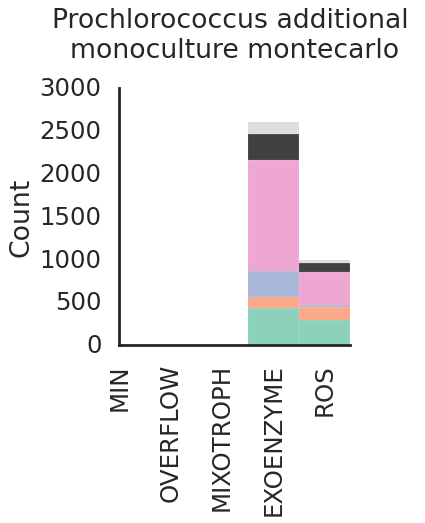

In [38]:
df_predicted_classes['model_'] = pd.Categorical(df_predicted_classes['model'], morder)

g = sns.displot(
    data=df_predicted_classes, linewidth=0.1,
    hue='y_pred', 
      discrete=True, multiple='stack',
    hue_order=reversed(gorder), palette=reversed(gpalette),
    x='model_', #col_order=morder,
    #y='VPRO_cluster',# row_order=['C1', 'C2', 'C3', 'C4', 'C0'],
    legend=False,
    #stat='probability',
    facet_kws=dict(sharex=False),
    #aspect=2,height=5, #col_wrap=3,
    
           ).set_titles(col_template='{col_name}').set(xlabel='')
g.set_xticklabels(rotation=90)
plt.title('Prochlorococcus additional \nmonoculture montecarlo', y=1.1)

# classify simulations

In [39]:
dpath = '../results'
sim_df = pd.read_csv(os.path.join(dpath,'monte_het_clean_df.csv.gz',))
mse_df = pd.read_csv(os.path.join(dpath,'monte_het_clean_mse.csv.gz',))

# sim_df = pd.concat([
#     sim_df1,
#     sim_df2,
#     sim_df3,
#     sim_df4,
#     sim_df5,
#     sim_df6,
#     sim_df7,
# ])

In [40]:
sim_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [41]:
X_sim, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(sim_df, groupby_cols=['run_id'])

In [42]:
df_predicted_classes = ml.ML_model_predict_proba(stack, X_sim)

In [43]:
df_predicted_classes

,run_id,y_pred,max_prob
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219
...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987644
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990016
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990016
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990016


In [44]:
y_sim_pred_prop = stack.predict_proba(X_sim)
y_sim_pred = stack.predict(X_sim)

In [45]:
max_sim_prob = np.amax(y_sim_pred_prop, axis=1)
max_sim_prob

array([0.97479897, 0.90278431, 0.98615709, ..., 0.99001587, 0.99001614,
       0.99022911])

In [46]:
df_predicted_prob = pd.DataFrame(y_sim_pred_prop, columns=stack.classes_)
df_predicted_prob['run_id'] =  X_sim.index
df_predicted_prob['y_pred'] =  y_sim_pred
df_predicted_prob['max_prob'] =  max_sim_prob
df_predicted_prob


,Axenic,Inhibited,Other,Strong,Sustained,Weak,run_id,y_pred,max_prob
0,0.003487,0.004346,0.009584,0.002713,0.974799,0.005072,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799
1,0.050194,0.011149,0.023930,0.005112,0.006830,0.902784,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784
2,0.986157,0.002125,0.007520,0.000963,0.001379,0.001856,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157
3,0.986658,0.002149,0.007135,0.000941,0.001277,0.001841,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658
4,0.978219,0.002945,0.011415,0.001539,0.002450,0.003432,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219
...,...,...,...,...,...,...,...,...,...
49344,0.002267,0.002547,0.004793,0.001179,0.001570,0.987644,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987644
49345,0.001625,0.002103,0.003976,0.000988,0.001292,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990016
49346,0.001625,0.002103,0.003976,0.000988,0.001292,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990016
49347,0.001625,0.002103,0.003976,0.000988,0.001292,0.990016,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990016


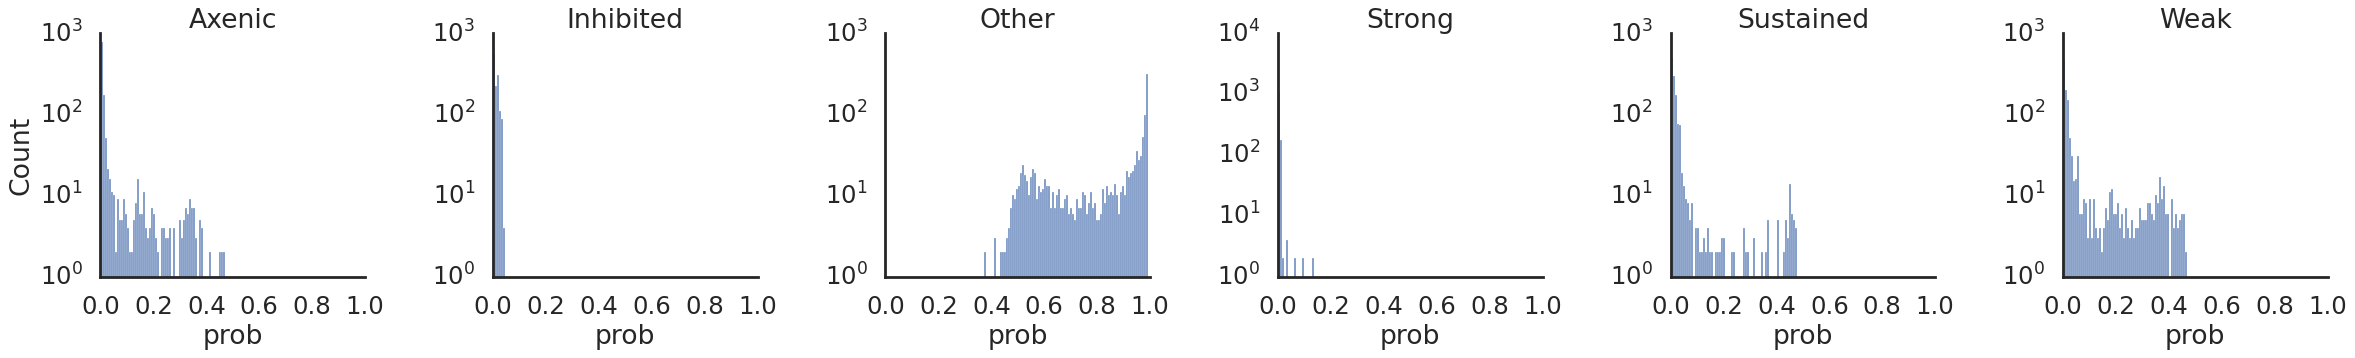

In [47]:
mdf_predicted_prob = df_predicted_prob.melt(
    id_vars=['run_id','y_pred', 'max_prob'], 
    value_vars=stack.classes_, 
    value_name='prob', var_name='Group')
g = sns.displot(
    data=mdf_predicted_prob.loc[mdf_predicted_prob.y_pred.isin(['Other'])], # & mdf_predicted_prob.max_prob.le(0.5)],
    x='prob', 
    col='Group', #col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
g.set(yscale='log')

In [48]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [49]:
df_predicted_classes_merged = pd.merge(df_predicted_classes, mse_df, left_on=['run_id', 'y_pred'], right_on=['run_id', 'Group'], how='left')

In [57]:
df_predicted_classes_merged['RMSE_filled'] = df_predicted_classes_merged['RMSE'].fillna(0)

In [58]:
df_predicted_classes_merged =df_predicted_classes_merged .reset_index(drop=True)

In [59]:
df_predicted_classes_merged_min = df_predicted_classes_merged.loc[
    df_predicted_classes_merged.groupby('run_id')['RMSE_filled'].idxmin()]

In [60]:
df_predicted_classes.shape, df_predicted_classes_merged.shape, mse_df.shape, df_predicted_classes_merged_min.shape

((49349, 8), (245465, 17), (1924611, 9), (49349, 17))

In [61]:
df_predicted_classes_merged_min

,run_id,y_pred,max_prob,idx,media,which,model,hash,Unnamed: 0,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,RMSE_filled
2,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,1369286.0,6C0,Ruegeria pomeroyi,Sustained,5.163371,50.710373,74.0,261.836489,261.836489
9,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,187008.0,11A0,Roseovarius 5C3,Weak,4.621448,30.284159,74.0,139.956662,139.956662
13,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,89707.0,1B0,Axenic,Axenic,2.342476,52.057268,74.0,121.942887,121.942887
16,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,738550.0,1B0,Axenic,Axenic,2.137782,47.880754,74.0,102.358629,102.358629
18,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,450690.0,1A0,Axenic,Axenic,10.777020,70.798705,74.0,762.999051,762.999051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245438,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987644,monte_ROS_9_monte_vpro_93_82_ROS_C1_64,lowN,all,ROS,h-8660846992299669535,157680.0,11A0,Roseovarius 5C3,Weak,4.590178,37.560730,74.0,172.410439,172.410439
245443,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_59,lowN,all,ROS,h-8660846992299669535,1898327.0,10C0,Marinovum 5F3,Weak,2.031882,22.689852,74.0,46.103093,46.103093
245449,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_66,lowN,all,ROS,h-8660846992299669535,1160915.0,10C0,Marinovum 5F3,Weak,2.074992,22.349891,74.0,46.375842,46.375842
245455,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990016,monte_ROS_9_monte_vpro_97_23_ROS_C1_3,lowN,all,ROS,h-8660846992299669535,1832456.0,10C0,Marinovum 5F3,Weak,4.263308,36.547564,74.0,155.813533,155.813533


In [62]:
df_predicted_classes_merged_min.to_csv('monte_het_predicted_classes.csv.gz', index=False)

In [63]:
df_sim_maxday  = X_sim[forest_features].reset_index()

In [64]:
df_sim_maxday.to_csv('features_monte_het_clean.csv.gz', index=False)

In [65]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
1,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,Weak,0.902784,monte_EXOENZYME_100_monte_vpro_12_88_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
2,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986157,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
3,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,Axenic,0.986658,monte_EXOENZYME_100_monte_vpro_13_4_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373
4,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Axenic,0.978219,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...
49344,monte_ROS_9_monte_vpro_93_82_ROS_C1_64_lowN_al...,Weak,0.987644,monte_ROS_9_monte_vpro_93_82_ROS_C1_64,lowN,all,ROS,h-8660846992299669535
49345,monte_ROS_9_monte_vpro_96_60_ROS_C1_59_lowN_al...,Weak,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_59,lowN,all,ROS,h-8660846992299669535
49346,monte_ROS_9_monte_vpro_96_60_ROS_C1_66_lowN_al...,Weak,0.990016,monte_ROS_9_monte_vpro_96_60_ROS_C1_66,lowN,all,ROS,h-8660846992299669535
49347,monte_ROS_9_monte_vpro_97_23_ROS_C1_3_lowN_all...,Weak,0.990016,monte_ROS_9_monte_vpro_97_23_ROS_C1_3,lowN,all,ROS,h-8660846992299669535


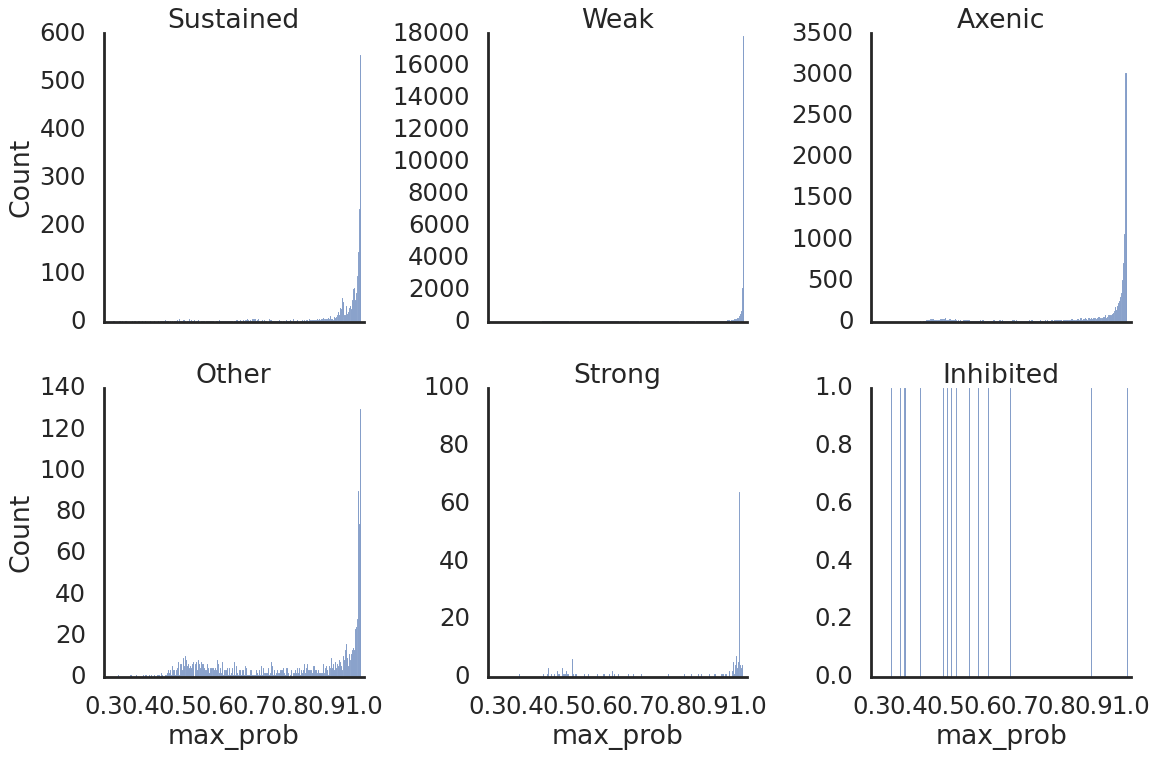

In [66]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='y_pred', col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

In [67]:
df_predicted_classes.y_pred.value_counts()

Weak         29575
Axenic       15791
Sustained     2406
Other         1292
Strong         267
Inhibited       18
Name: y_pred, dtype: int64

In [68]:
df_predicted_classes_merged_min.y_pred.value_counts()

Weak         29575
Axenic       15791
Sustained     2406
Other         1292
Strong         267
Inhibited       18
Name: y_pred, dtype: int64

Text(0.5, 1.1, 'co-cultures  montecarlo')

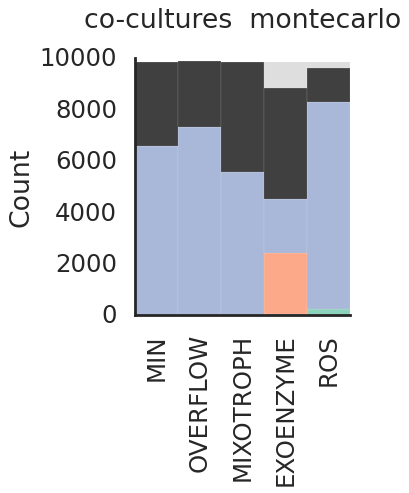

In [70]:
df_predicted_classes['model_'] = pd.Categorical(df_predicted_classes['model'], morder)

g = sns.displot(
    data=df_predicted_classes, linewidth=0.1,
    hue='y_pred', 
      discrete=True, multiple='stack',
    hue_order=reversed(gorder), palette=reversed(gpalette),
    x='model_', #col_order=morder,
    #y='VPRO_cluster',# row_order=['C1', 'C2', 'C3', 'C4', 'C0'],
    legend=False,
    #stat='probability',
    facet_kws=dict(sharex=False),
    #aspect=2,height=5, #col_wrap=3,
    
           ).set_titles(col_template='{col_name}').set(xlabel='')
g.set_xticklabels(rotation=90)
plt.title('co-cultures  montecarlo', y=1.1)

In [71]:
sample_ids = df_predicted_classes.groupby(['model','y_pred']).run_id.sample(50, replace=True)

In [72]:
sample_df = sim_df.loc[sim_df.run_id.isin(sample_ids)]
sample_df = sample_df.merge(df_predicted_classes, on='run_id', how='left')
sample_df

,Unnamed: 0,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,...,Bhtotal[C],run_id,y_pred,max_prob,idx,media,which,model,hash,model_
0,13986,0.892857,0.000000,0.000000,28.571429,0.000000,0.000000e+00,3.000000,0.000000,1.000000e+02,...,142.857143,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,Other,0.907364,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,EXOENZYME
1,13987,1.577543,0.760657,3.761689,26.244892,8.648088,-3.572271e-21,1.317523,1.561431,9.235415e+01,...,131.224459,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,Other,0.907364,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,EXOENZYME
2,13988,3.603683,1.748230,8.648797,21.892424,9.420214,-5.286341e-21,2.406091,3.157614,9.023603e+01,...,109.462119,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,Other,0.907364,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,EXOENZYME
3,13989,5.625260,2.729055,13.500187,20.472222,9.068150,5.319659e-02,3.039194,4.078724,8.745168e+01,...,102.414306,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,Other,0.907364,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,EXOENZYME
4,13990,12.142800,5.891418,29.134613,19.966218,6.744461,1.043537e+00,4.699280,5.973079,7.704703e+01,...,100.874627,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,Other,0.907364,monte_EXOENZYME_56_monte_vpro_75_68_EXOENZYME_...,lowN,all,EXOENZYME,h8519271514136708373,EXOENZYME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55717,3692206,1.354284,0.000016,4.046060,0.044352,0.002631,1.624872e-01,0.024025,131.038978,6.325315e-08,...,0.384248,monte_ROS_41_monte_vpro_19_33_ROS_C0_84_lowN_a...,Strong,0.978923,monte_ROS_41_monte_vpro_19_33_ROS_C0_84,lowN,all,ROS,h-8660846992299669535,ROS
55718,3692207,1.146885,0.000016,3.426436,0.036483,0.002165,1.336375e-01,0.024045,131.254692,7.476989e-08,...,0.316051,monte_ROS_41_monte_vpro_19_33_ROS_C0_84_lowN_a...,Strong,0.978923,monte_ROS_41_monte_vpro_19_33_ROS_C0_84,lowN,all,ROS,h-8660846992299669535,ROS
55719,3692208,1.040351,0.000016,3.108152,0.032486,0.001928,1.189834e-01,0.024058,131.365447,8.248514e-08,...,0.281411,monte_ROS_41_monte_vpro_19_33_ROS_C0_84_lowN_a...,Strong,0.978923,monte_ROS_41_monte_vpro_19_33_ROS_C0_84,lowN,all,ROS,h-8660846992299669535,ROS
55720,3692209,0.943994,0.000016,2.820278,0.028905,0.001717,1.058562e-01,0.024073,131.465581,9.097604e-08,...,0.250380,monte_ROS_41_monte_vpro_19_33_ROS_C0_84_lowN_a...,Strong,0.978923,monte_ROS_41_monte_vpro_19_33_ROS_C0_84,lowN,all,ROS,h-8660846992299669535,ROS


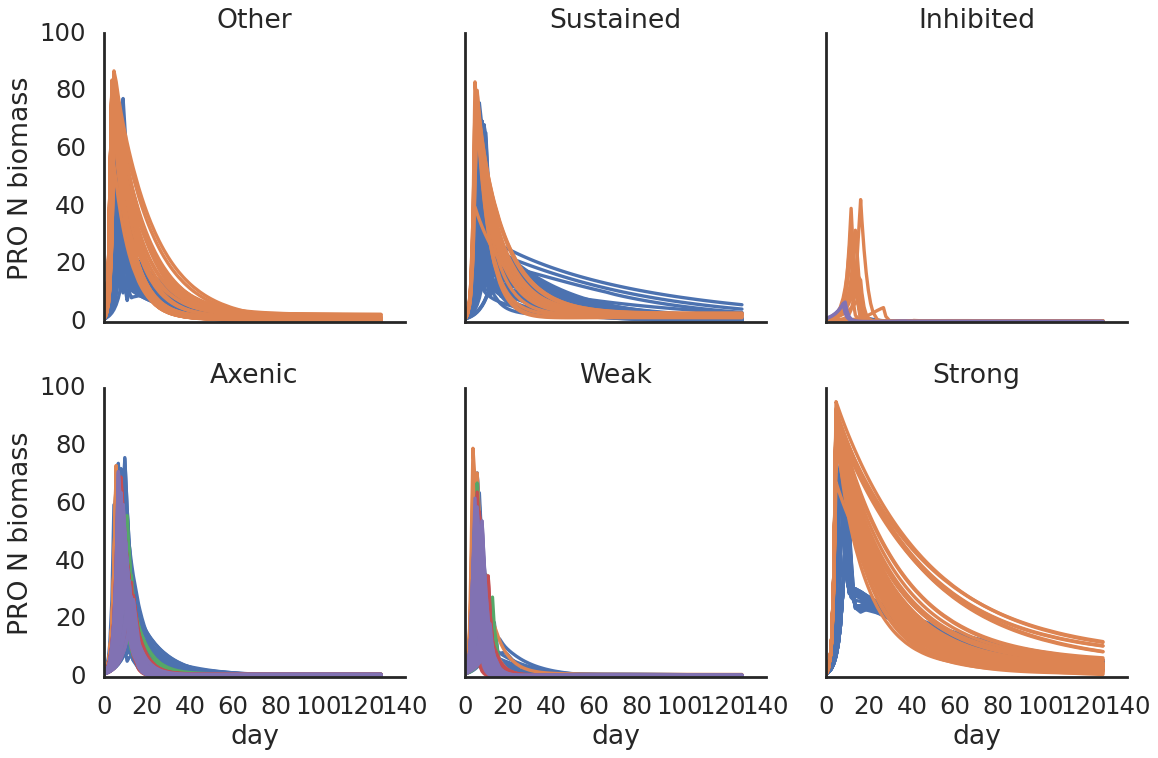

In [73]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
#    for (col_val), ax in g.axes_dict.items():
#         if col_val != 'Other':
#             sns.lineplot(
#                 data=refdf.loc[refdf['train_Group'].isin([col_val])],
#                 x='day', y='log_Nbiomass',
#             units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
#                 zorder=-1,

#                          legend=False
#                         )
    g.set(ylabel='PRO N biomass')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

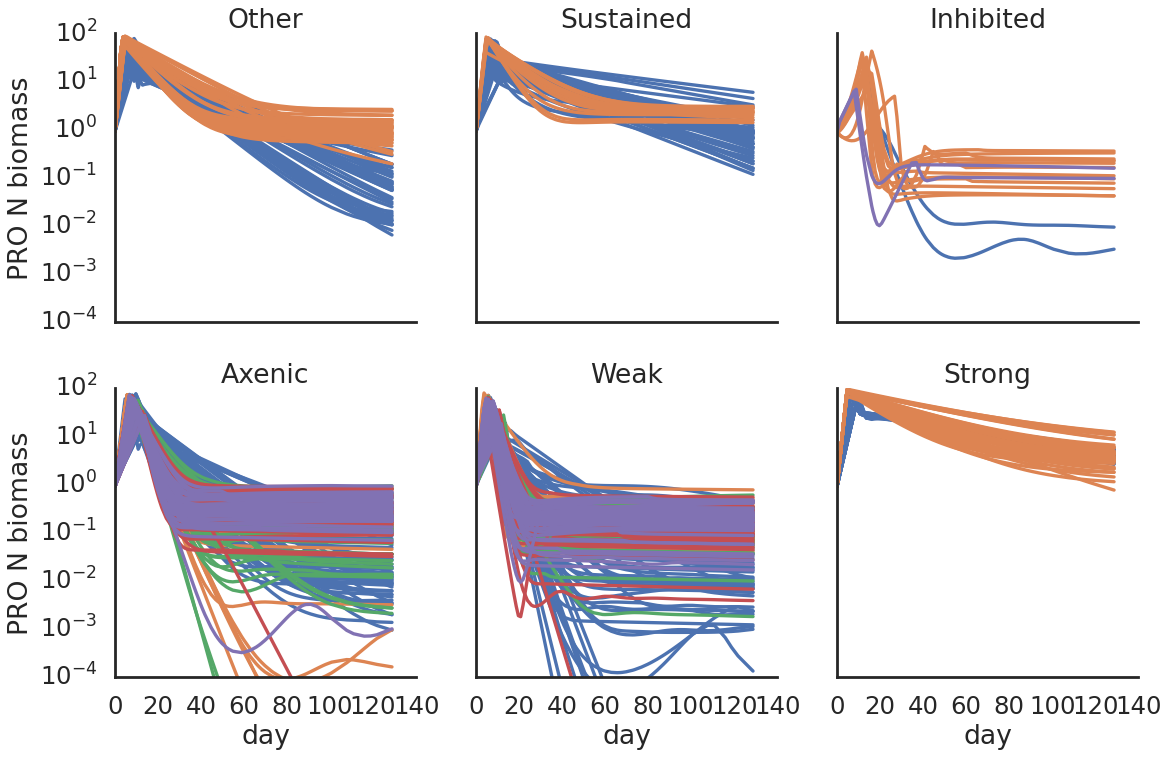

In [74]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        hue='model',
        x='day', y=f'ref_Bp[N]', 
        col='y_pred', col_wrap=3,
        #facet_kws=dict( margin_titles=True),
        legend=False
    )
#    for (col_val), ax in g.axes_dict.items():
#         if col_val != 'Other':
#             sns.lineplot(
#                 data=refdf.loc[refdf['train_Group'].isin([col_val])],
#                 x='day', y='log_Nbiomass',
#             units='Sample', estimator=None, ax=ax, lw=0.5, color='red',
#                 zorder=-1,

#                          legend=False
#                         )
    g.set(ylabel='PRO N biomass', yscale='log', ylim=(1e-4, 1e2))
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

# classify additional simulations

In [83]:
dpath = '../results'
sim_df = pd.read_csv(os.path.join(dpath,'monte_add_het_clean_df.csv.gz',))
mse_df = pd.read_csv(os.path.join(dpath,'monte_add_het_clean_mse.csv.gz',))

# sim_df = pd.concat([
#     sim_df1,
#     sim_df2,
#     sim_df3,
#     sim_df4,
#     sim_df5,
#     sim_df6,
#     sim_df7,
# ])

In [84]:
sim_df.rename(columns={'Bptotal[N]':'ref_Bp[N]','Bptotal[C]':'ref_Bp[C]'}, inplace=True)

In [85]:
X_sim, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(sim_df, groupby_cols=['run_id'])

In [86]:
df_predicted_classes = ml.ML_model_predict_proba(stack, X_sim)

In [87]:
df_predicted_classes

,run_id,y_pred,max_prob
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536
...,...,...,...
19748,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93_...,Inhibited,0.620482
19749,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,0.407143
19750,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...,Strong,0.978074
19751,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_...,Axenic,0.685280


In [88]:
df_predicted_classes[['idx', 'media', 'which', 'model', 'hash']] = df_predicted_classes.run_id.str.rsplit('_', n=4, expand=True)


In [89]:
df_predicted_classes_merged = pd.merge(df_predicted_classes, mse_df, left_on=['run_id', 'y_pred'], right_on=['run_id', 'Group'], how='left')

In [90]:
df_predicted_classes_merged['RMSE_filled'] = df_predicted_classes_merged['RMSE'].fillna(0)

In [91]:
df_predicted_classes_merged =df_predicted_classes_merged .reset_index(drop=True)

In [92]:
df_predicted_classes_merged_min = df_predicted_classes_merged.loc[
    df_predicted_classes_merged.groupby('run_id')['RMSE_filled'].idxmin()]

In [93]:
df_predicted_classes.shape, df_predicted_classes_merged.shape, mse_df.shape, df_predicted_classes_merged_min.shape

((19753, 8), (115718, 17), (770367, 9), (19753, 17))

In [94]:
df_predicted_classes_merged_min.to_csv('monte_add_het_predicted_classes.csv.gz', index=False)

In [95]:
df_sim_maxday  = X_sim[forest_features].reset_index()

In [96]:
df_sim_maxday.to_csv('features_monte_add_het_clean.csv.gz', index=False)

In [97]:
df_predicted_classes

,run_id,y_pred,max_prob,idx,media,which,model,hash
0,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989477,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373
1,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Weak,0.989400,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373
2,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Other,0.528581,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373
3,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,Axenic,0.624934,monteadd2_EXOENZYME_13_monte_vpro_11_62_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373
4,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,Axenic,0.968536,monteadd2_EXOENZYME_13_monte_vpro_13_69_EXOENZ...,lowN,all,EXOENZYME,h8519271514136708373
...,...,...,...,...,...,...,...,...
19748,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93_...,Inhibited,0.620482,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_962_93,lowN,all,ROS,h-8660846992299669535
19749,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,0.407143,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4,lowN,all,ROS,h-8660846992299669535
19750,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59_...,Strong,0.978074,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_980_59,lowN,all,ROS,h-8660846992299669535
19751,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14_...,Axenic,0.685280,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_994_14,lowN,all,ROS,h-8660846992299669535


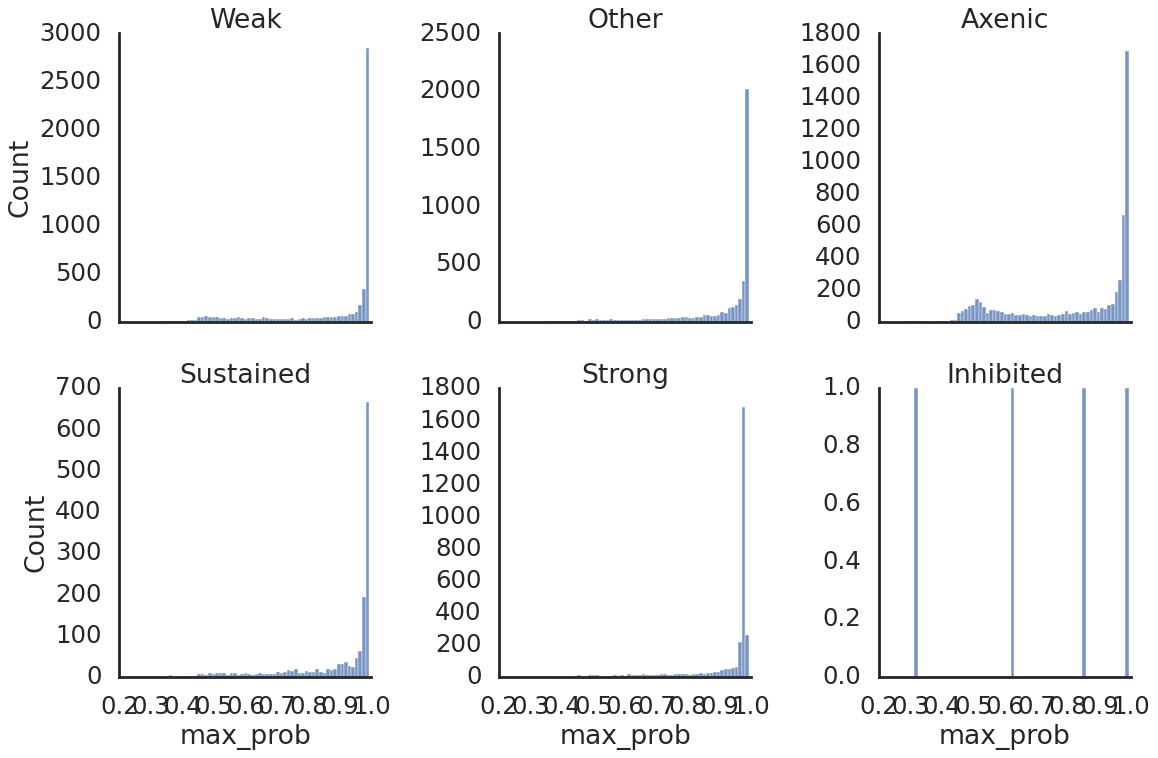

In [98]:
g = sns.displot(
    data=df_predicted_classes,
    x='max_prob', 
    col='y_pred', col_wrap=3, #hue='model', multiple='stack', 
    facet_kws=dict(sharey=False, ),
    #row='model',

)
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

In [99]:
df_predicted_classes.y_pred.value_counts()

Axenic       5679
Weak         5358
Other        4247
Strong       2956
Sustained    1509
Inhibited       4
Name: y_pred, dtype: int64

Text(0.5, 1.1, 'co-cultures \nadditional montecarlo')

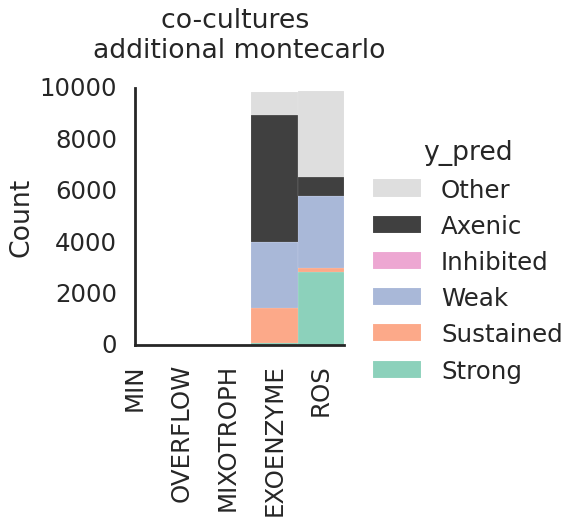

In [101]:
df_predicted_classes['model_'] = pd.Categorical(df_predicted_classes['model'], morder)

g = sns.displot(
    data=df_predicted_classes, linewidth=0.1,
    hue='y_pred', 
      discrete=True, multiple='stack',
    hue_order=reversed(gorder), palette=reversed(gpalette),
    x='model_', #col_order=morder,
    #y='VPRO_cluster',# row_order=['C1', 'C2', 'C3', 'C4', 'C0'],
    #legend=False,
    #stat='probability',
    facet_kws=dict(sharex=False),
    #aspect=2,height=5, #col_wrap=3,
    
           ).set_titles(col_template='{col_name}').set(xlabel='')
g.set_xticklabels(rotation=90)
plt.title('co-cultures \nadditional montecarlo', y=1.1)